In [18]:
import requests
import pandas as pd
import dill
import matplotlib.pyplot as plt

### Get Property Sales Records

In [ ]:
def get_property_records (offset, req_count):
    
    url = "https://realty-mole-property-api.p.rapidapi.com/properties"
    headers = {"X-RapidAPI-Key": keys[0],
               "X-RapidAPI-Host": "realty-mole-property-api.p.rapidapi.com"}
    
    prop_list = []
    counter=1

    while counter<=req_count:
        querystring = {       
               'latitude': 39.95319507488926, # center city Philadelphia
               'longitude': -75.16433231975176,
               'propertyType': 'Single Family, Townhouse, Condo, Apartment',
               'radius': 41, # 25 mile radius in kilometers,
               'limit': 500,
               'offset':offset
               }
        response = requests.get(url, headers=headers, params=querystring)
        prop_list.extend(response.json())
        offset+=500
        counter+=1
        
    new_offset = offset        
    return prop_list, new_offset

In [ ]:
#home_list_0_150k, i = get_property_records(offset=0, req_count=300)
#home_list_150k_500k, i = get_property_records(offset=150000, req_count=700)
#home_list_500k_750k, j = get_property_records(offset=500000, req_count=500)
home_list_750k_1M, k = get_property_records(offset=750000, req_count=500)
home_list_end, k = get_property_records(offset=1e6, req_count=700)


In [ ]:
#convert to df

df1= pd.DataFrame(home_list_0_150k)
df2= pd.DataFrame(home_list_150k_500k)
df3= pd.DataFrame(home_list_500k_750k)
df4= pd.DataFrame(home_list_750k_1M)
df5= pd.DataFrame(home_list_750k_1M)
df6= pd.DataFrame(home_list_end)

df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index = True)


In [ ]:
# Remove duplicates in the data

In [6]:
df =df[df.duplicated(subset=['id', 'lastSaleDate', 'lastSalePrice', 'squareFootage'], keep='first')==False]
df.shape

(1135952, 27)

In [ ]:
# Change SalesDate data type and add Sales Year

In [12]:
df['lastSaleDate'] = pd.to_datetime(df['lastSaleDate'])
df['lastSaleYear'] = df['lastSaleDate'].dt.year

In [13]:
#filter by property type

df_filtered = pd.DataFrame(df.query("propertyType in ('Single Family', 'Townhouse', 'Condo', 'Duplex-Triplex')"))

print(df_filtered['propertyType'].unique())

['Single Family' 'Duplex-Triplex' 'Townhouse' 'Condo']


In [14]:
df_filtered.shape

(802965, 28)

In [16]:
df_filtered.loc[df_filtered['lastSaleYear']>=2000, 'lastSaleYear'].value_counts()

2019.0    28020
2018.0    26300
2021.0    24903
2017.0    24585
2020.0    24500
2022.0    24284
2016.0    21099
2015.0    17990
2006.0    15960
2005.0    15662
2014.0    14869
2007.0    14695
2004.0    14579
2013.0    14236
2003.0    12219
2012.0    11881
2008.0    11838
2002.0    11346
2009.0    11151
2010.0    10853
2001.0    10657
2011.0    10266
2000.0    10158
2023.0     5928
Name: lastSaleYear, dtype: int64

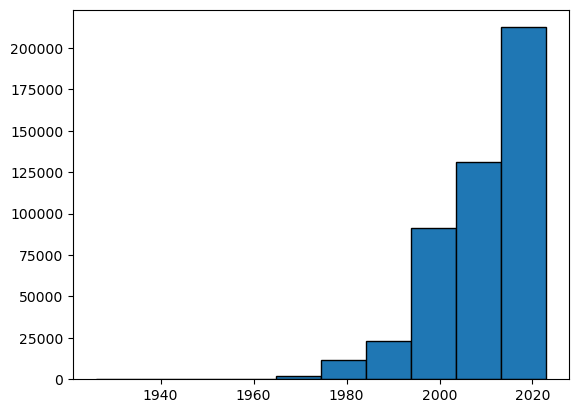

In [19]:
plt.hist(df_filtered['lastSaleYear'], bins=10, edgecolor='black')
plt.show()

In [20]:
#remove any records above 3.5 mil and any records which are not single family homes above 1.5 mil

#df['lastSalePrice']<3.5e6

df_filtered = df_filtered.query("lastSalePrice < 3.5e6")

df_filtered= df_filtered.query("propertyType == 'Single Family' or (propertyType != 'Single Family' and lastSalePrice <1.5e6)")

df_filtered.shape

(470109, 28)

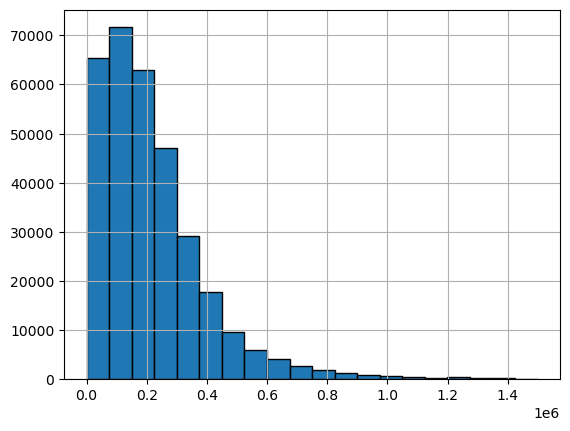

In [23]:
plt.hist(df_filtered.loc[(df_filtered['propertyType']=='Single Family') & (df_filtered['lastSalePrice'] <1.5e6), 'lastSalePrice'], bins=20, edgecolor='black')
plt.grid(True)
plt.show()